In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import BaggingClassifier, StackingClassifier
from sklearn.svm import SVR, SVC
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore') # Suppress all warnings to clean up output
np.random.seed(42) # Fixes randomness in NumPy operations for reproducible results
import IPython
from IPython import display

In [2]:
# Load dataset
file_path = "/kaggle/input/bdjobsdotcom/bdjobscom_cleaned.csv"
df = pd.read_csv(file_path)
df_copy = df

# Preview dataset
print("Shape:", df.shape)
df_copy.head()

Shape: (5548, 18)


,Company Name,Employment Status,Experience Cat,job_category_id,Location,Min Experience,Bonus,Gratuity,Insurance,Mobile Bill,Provident Fund,job title,vacancy,Degree,In Dhaka,avg_salary,avg_age,Gender
0,Lal Teer Livestock Ltd.,full_time,senior,1,Dhaka,5,True,False,False,True,True,Manager - Compliance & Inventory,2,masters,True,33750.0,35.0,3
1,SQ Group of Companies,full_time,mid,1,Dhaka,4,True,False,False,True,False,Deputy Manager/ Manager – Accounts,2,professional,True,33750.0,36.5,3
2,A Reputed Apartment & Developers Company,full_time,senior,1,Chattogram,5,False,False,False,False,False,Senior Accountant,1,other,False,33750.0,30.0,3
3,MUNIA OVERSEAS (RL-2452),full_time,mid,1,Uttara Sector 17,2,True,False,False,True,False,ACCOUNTS,5,other,False,33750.0,29.0,2
4,Sino Bangladesh Trade International Ltd,full_time,mid,1,Banani,2,True,False,False,True,False,Accountant & Finance Officer,2,bachelors,False,27500.0,30.0,2


In [3]:
print('Shape before deleting duplicate values:', df_copy.shape) # .shape: Returns the (rows, columns) of the DataFrame
# df_copy=df_copy.drop_duplicates() # .drop_duplicates(): Removes duplicate rows (if any) from the DataFrame
print('Shape After deleting duplicate values:', df_copy.shape)

Shape before deleting duplicate values: (5548, 18)
Shape After deleting duplicate values: (5548, 18)


In [4]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5548 entries, 0 to 5547
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company Name       5548 non-null   object 
 1   Employment Status  5548 non-null   object 
 2   Experience Cat     5548 non-null   object 
 3   job_category_id    5548 non-null   int64  
 4   Location           5548 non-null   object 
 5   Min Experience     5548 non-null   int64  
 6   Bonus              5548 non-null   bool   
 7   Gratuity           5548 non-null   bool   
 8   Insurance          5548 non-null   bool   
 9   Mobile Bill        5548 non-null   bool   
 10  Provident Fund     5548 non-null   bool   
 11  job title          5548 non-null   object 
 12  vacancy            5548 non-null   int64  
 13  Degree             5548 non-null   object 
 14  In Dhaka           5548 non-null   bool   
 15  avg_salary         5548 non-null   float64
 16  avg_age            5548 

In [5]:
df_copy.isnull().sum() 
# .isnull(): Checks for missing (NaN) values  
# .sum(): Counts total missing values per column

Company Name         0
Employment Status    0
Experience Cat       0
job_category_id      0
Location             0
Min Experience       0
Bonus                0
Gratuity             0
Insurance            0
Mobile Bill          0
Provident Fund       0
job title            0
vacancy              0
Degree               0
In Dhaka             0
avg_salary           0
avg_age              0
Gender               0
dtype: int64

In [6]:
IPython.display.display(df_copy.describe()) 

,job_category_id,Min Experience,vacancy,avg_salary,avg_age,Gender
count,5548.000000,5548.000000,5548.000000,5548.000000,5548.000000,5548.000000
mean,18.237203,3.589402,5.429704,33750.000631,30.585797,2.483598
std,22.065090,2.883992,25.718539,19516.488149,3.574320,0.834568
min,1.000000,0.000000,0.000000,5000.000000,20.000000,1.000000
25%,5.000000,2.000000,1.000000,33750.000000,30.000000,2.000000
50%,10.000000,3.000000,2.000000,33750.000000,30.000000,3.000000
75%,19.000000,4.000000,2.000000,33750.000000,30.000000,3.000000
max,92.000000,35.000000,850.000000,600000.000000,55.000000,3.000000


In [7]:
df_copy.nunique() # .nunique(): Counts unique values per column

Company Name         2631
Employment Status       6
Experience Cat          4
job_category_id        60
Location              325
Min Experience         21
Bonus                   2
Gratuity                2
Insurance               2
Mobile Bill             2
Provident Fund          2
job title            3871
vacancy                69
Degree                  4
In Dhaka                2
avg_salary            169
avg_age                57
Gender                  3
dtype: int64

In [8]:
# Convert boolean columns into integers (0 = False, 1 = True)
bool_cols = ["Bonus", "Gratuity", "Insurance", "Mobile Bill", "Provident Fund", "In Dhaka"]

for col in bool_cols:
    if col in df_copy.columns:
        df_copy[col] = df_copy[col].astype(int)

# Check result
df_copy[bool_cols].head()

,Bonus,Gratuity,Insurance,Mobile Bill,Provident Fund,In Dhaka
0,1,0,0,1,1,1
1,1,0,0,1,0,1
2,0,0,0,0,0,0
3,1,0,0,1,0,0
4,1,0,0,1,0,0


In [9]:
df_copy['Degree']

0            masters
1       professional
2              other
3              other
4          bachelors
            ...     
5543    professional
5544           other
5545           other
5546    professional
5547           other
Name: Degree, Length: 5548, dtype: object

In [10]:
# Encode as numerical values
degree_map = {
    "bachelors": 0,
    "masters": 1,
    "professional": 2,
    "other": 3
}
df_copy["Degree"] = df_copy["Degree"].map(degree_map)
df_copy["Degree"]

0       1
1       2
2       3
3       3
4       0
       ..
5543    2
5544    3
5545    3
5546    2
5547    3
Name: Degree, Length: 5548, dtype: int64

In [11]:
df_copy

,Company Name,Employment Status,Experience Cat,job_category_id,Location,Min Experience,Bonus,Gratuity,Insurance,Mobile Bill,Provident Fund,job title,vacancy,Degree,In Dhaka,avg_salary,avg_age,Gender
0,Lal Teer Livestock Ltd.,full_time,senior,1,Dhaka,5,1,0,0,1,1,Manager - Compliance & Inventory,2,1,1,33750.0,35.0,3
1,SQ Group of Companies,full_time,mid,1,Dhaka,4,1,0,0,1,0,Deputy Manager/ Manager – Accounts,2,2,1,33750.0,36.5,3
2,A Reputed Apartment & Developers Company,full_time,senior,1,Chattogram,5,0,0,0,0,0,Senior Accountant,1,3,0,33750.0,30.0,3
3,MUNIA OVERSEAS (RL-2452),full_time,mid,1,Uttara Sector 17,2,1,0,0,1,0,ACCOUNTS,5,3,0,33750.0,29.0,2
4,Sino Bangladesh Trade International Ltd,full_time,mid,1,Banani,2,1,0,0,1,0,Accountant & Finance Officer,2,0,0,27500.0,30.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5543,Amin Physiotherapy & Fitness Center,full_time,unknown,92,Sylhet,3,0,0,0,0,0,Medical Technologist / Physiotherapist,4,2,0,20000.0,27.5,3
5544,E-Learning And Earning Ltd (Barishal Branch),full_time,entry,92,Barishal Sadar,1,1,0,0,0,0,অফিস সহায়ক (পুরুষ),1,3,0,7000.0,26.5,1
5545,Techno Health Bangladesh,full_time,entry,92,Uttara,1,0,0,0,0,0,Clinical Physiotherapist,10,3,0,25000.0,30.0,2
5546,ASPC ManipulationTherapy centre,full_time,unknown,92,Mohammadpur,3,1,0,0,0,0,Medical Technologist (Physiotherapy),5,2,0,18000.0,30.0,3


In [12]:
df_copy['Employment Status']

0       full_time
1       full_time
2       full_time
3       full_time
4       full_time
          ...    
5543    full_time
5544    full_time
5545    full_time
5546    full_time
5547    full_time
Name: Employment Status, Length: 5548, dtype: object

In [13]:
#Map categorical values to numeric codes
employment_mapping = {
    "full_time": 0,
    "part_time": 1,
    "contract": 2,
    "intern": 3,
    "other": 4,
    "unknown": 5
}

# Apply mapping
df_copy['Employment Status'] = df_copy['Employment Status'].map(employment_mapping)
df_copy['Employment Status']

0       0
1       0
2       0
3       0
4       0
       ..
5543    0
5544    0
5545    0
5546    0
5547    0
Name: Employment Status, Length: 5548, dtype: int64

In [14]:
df_copy

,Company Name,Employment Status,Experience Cat,job_category_id,Location,Min Experience,Bonus,Gratuity,Insurance,Mobile Bill,Provident Fund,job title,vacancy,Degree,In Dhaka,avg_salary,avg_age,Gender
0,Lal Teer Livestock Ltd.,0,senior,1,Dhaka,5,1,0,0,1,1,Manager - Compliance & Inventory,2,1,1,33750.0,35.0,3
1,SQ Group of Companies,0,mid,1,Dhaka,4,1,0,0,1,0,Deputy Manager/ Manager – Accounts,2,2,1,33750.0,36.5,3
2,A Reputed Apartment & Developers Company,0,senior,1,Chattogram,5,0,0,0,0,0,Senior Accountant,1,3,0,33750.0,30.0,3
3,MUNIA OVERSEAS (RL-2452),0,mid,1,Uttara Sector 17,2,1,0,0,1,0,ACCOUNTS,5,3,0,33750.0,29.0,2
4,Sino Bangladesh Trade International Ltd,0,mid,1,Banani,2,1,0,0,1,0,Accountant & Finance Officer,2,0,0,27500.0,30.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5543,Amin Physiotherapy & Fitness Center,0,unknown,92,Sylhet,3,0,0,0,0,0,Medical Technologist / Physiotherapist,4,2,0,20000.0,27.5,3
5544,E-Learning And Earning Ltd (Barishal Branch),0,entry,92,Barishal Sadar,1,1,0,0,0,0,অফিস সহায়ক (পুরুষ),1,3,0,7000.0,26.5,1
5545,Techno Health Bangladesh,0,entry,92,Uttara,1,0,0,0,0,0,Clinical Physiotherapist,10,3,0,25000.0,30.0,2
5546,ASPC ManipulationTherapy centre,0,unknown,92,Mohammadpur,3,1,0,0,0,0,Medical Technologist (Physiotherapy),5,2,0,18000.0,30.0,3


In [15]:
# Map categorical values to numeric codes for Experience Cat
experience_mapping = {
    "senior": 0,
    "mid": 1,
    "entry": 2,
    "unknown": 3
}
df_copy['Experience Cat'] = df_copy['Experience Cat'].map(experience_mapping)
df_copy['Experience Cat']

0       0
1       1
2       0
3       1
4       1
       ..
5543    3
5544    2
5545    2
5546    3
5547    3
Name: Experience Cat, Length: 5548, dtype: int64

In [16]:
df_copy = df_copy.drop(columns=["Experience Cat", "Company Name", "job title"])
df_copy

,Employment Status,job_category_id,Location,Min Experience,Bonus,Gratuity,Insurance,Mobile Bill,Provident Fund,vacancy,Degree,In Dhaka,avg_salary,avg_age,Gender
0,0,1,Dhaka,5,1,0,0,1,1,2,1,1,33750.0,35.0,3
1,0,1,Dhaka,4,1,0,0,1,0,2,2,1,33750.0,36.5,3
2,0,1,Chattogram,5,0,0,0,0,0,1,3,0,33750.0,30.0,3
3,0,1,Uttara Sector 17,2,1,0,0,1,0,5,3,0,33750.0,29.0,2
4,0,1,Banani,2,1,0,0,1,0,2,0,0,27500.0,30.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5543,0,92,Sylhet,3,0,0,0,0,0,4,2,0,20000.0,27.5,3
5544,0,92,Barishal Sadar,1,1,0,0,0,0,1,3,0,7000.0,26.5,1
5545,0,92,Uttara,1,0,0,0,0,0,10,3,0,25000.0,30.0,2
5546,0,92,Mohammadpur,3,1,0,0,0,0,5,2,0,18000.0,30.0,3


In [17]:
df = df_copy.drop(columns=['Location'])
df

,Employment Status,job_category_id,Min Experience,Bonus,Gratuity,Insurance,Mobile Bill,Provident Fund,vacancy,Degree,In Dhaka,avg_salary,avg_age,Gender
0,0,1,5,1,0,0,1,1,2,1,1,33750.0,35.0,3
1,0,1,4,1,0,0,1,0,2,2,1,33750.0,36.5,3
2,0,1,5,0,0,0,0,0,1,3,0,33750.0,30.0,3
3,0,1,2,1,0,0,1,0,5,3,0,33750.0,29.0,2
4,0,1,2,1,0,0,1,0,2,0,0,27500.0,30.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5543,0,92,3,0,0,0,0,0,4,2,0,20000.0,27.5,3
5544,0,92,1,1,0,0,0,0,1,3,0,7000.0,26.5,1
5545,0,92,1,0,0,0,0,0,10,3,0,25000.0,30.0,2
5546,0,92,3,1,0,0,0,0,5,2,0,18000.0,30.0,3


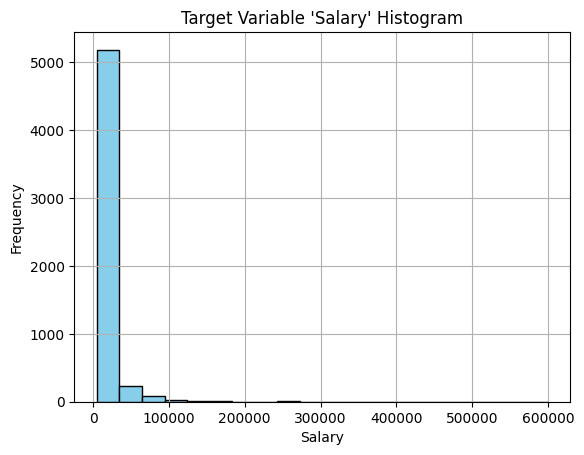

In [18]:
# Histogram of Salary
df_copy.hist(column='avg_salary', color='skyblue', bins=20, edgecolor='black')
plt.title("Target Variable 'Salary' Histogram")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

In [19]:
def PlotBarCharts(inpData, colsToPlot):
    fig, subPlot = plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(16 * len(colsToPlot), 5))
    fig.suptitle('Bar charts of: ' + str(colsToPlot))

    # Ensure subPlot is always iterable
    if len(colsToPlot) == 1:
        subPlot = [subPlot]

    for colName, ax in zip(colsToPlot, subPlot):
        inpData.groupby(colName).size().plot(kind='bar', ax=ax, color="skyblue", edgecolor='black')

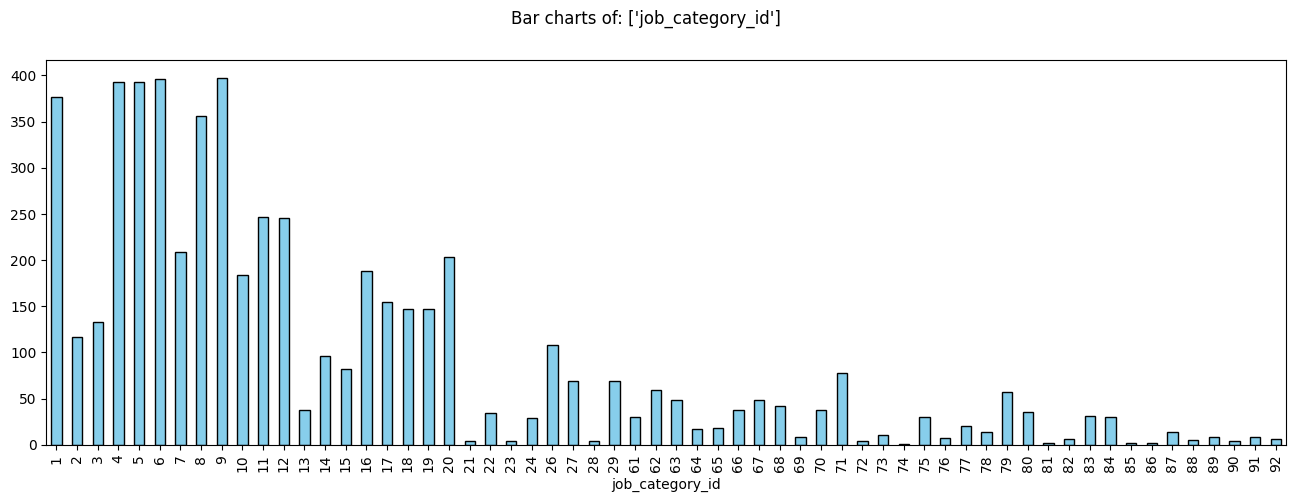

In [20]:
PlotBarCharts(inpData=df, colsToPlot=['job_category_id'])

In [21]:
def PlotBarCharts(inpData, colsToPlot):
    fig, subPlot = plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(8  * len(colsToPlot), 5))
    fig.suptitle('Bar charts of: ' + str(colsToPlot))

    # Ensure subPlot is always iterable
    if len(colsToPlot) == 1:
        subPlot = [subPlot]

    for colName, ax in zip(colsToPlot, subPlot):
        inpData.groupby(colName).size().plot(kind='bar', ax=ax, color="skyblue", edgecolor='black')

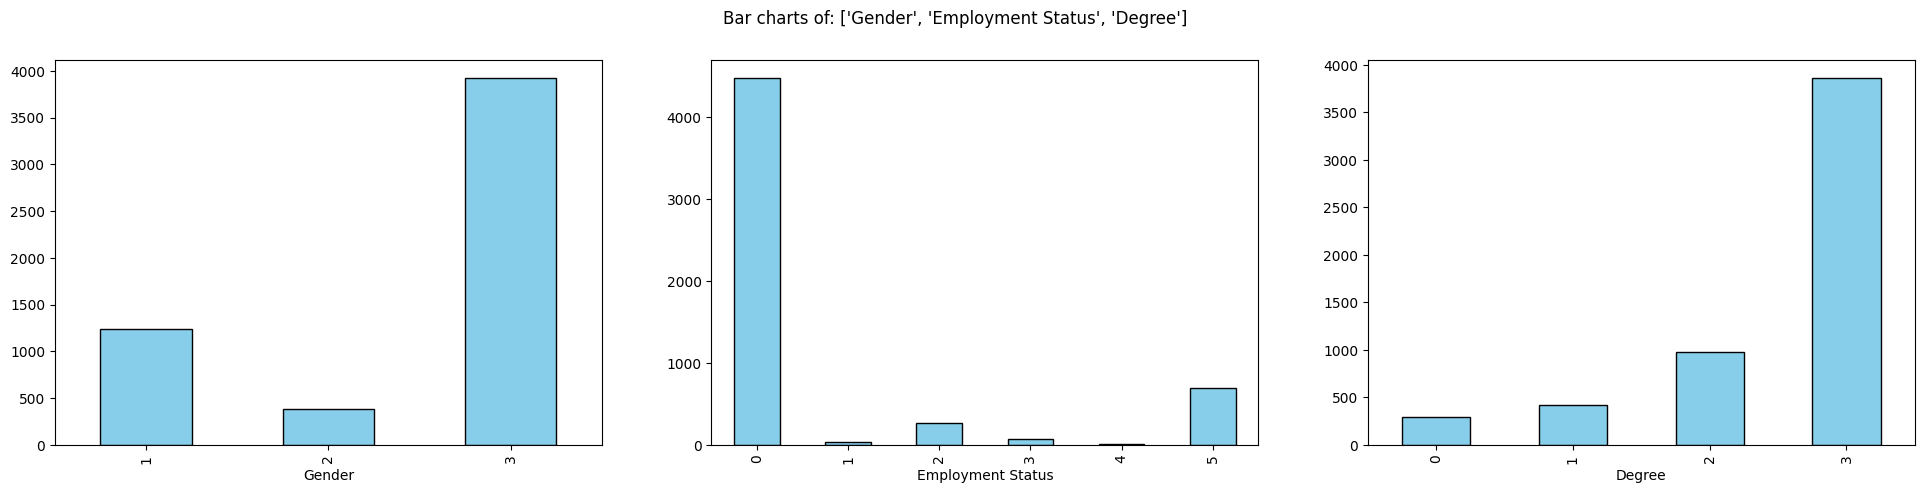

In [22]:
PlotBarCharts(inpData=df, colsToPlot=['Gender', 'Employment Status', 'Degree'])

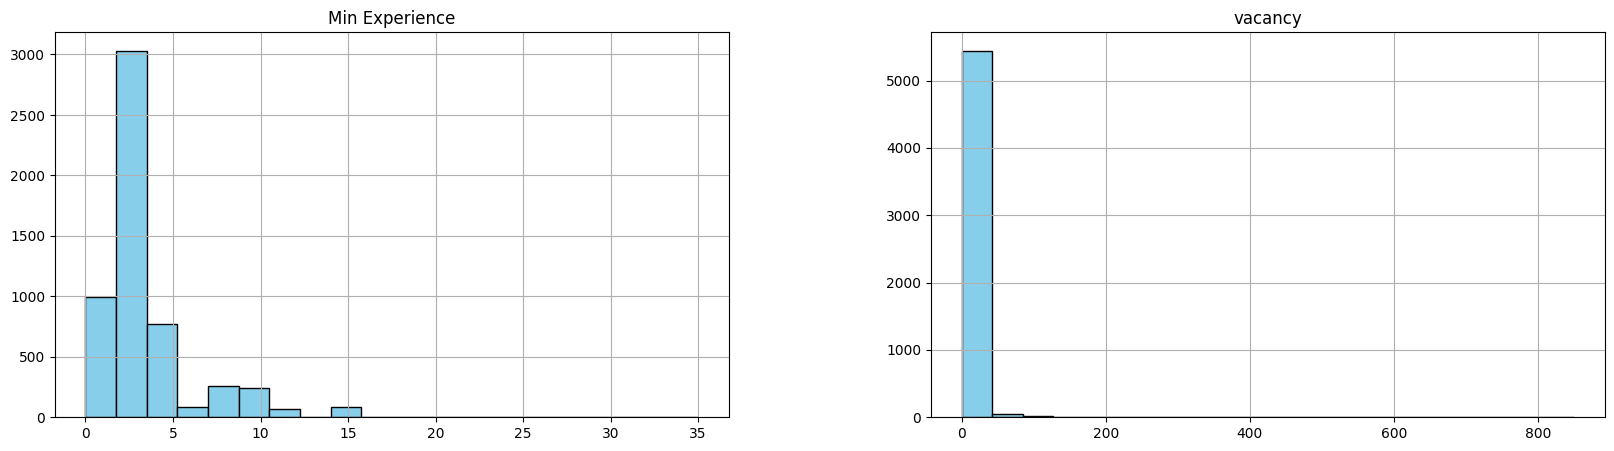

In [23]:
# Plotting histograms of multiple columns together
df.hist(['Min Experience', 'vacancy'], figsize=(20,5), color="skyblue", bins=20, edgecolor='black')
plt.show()

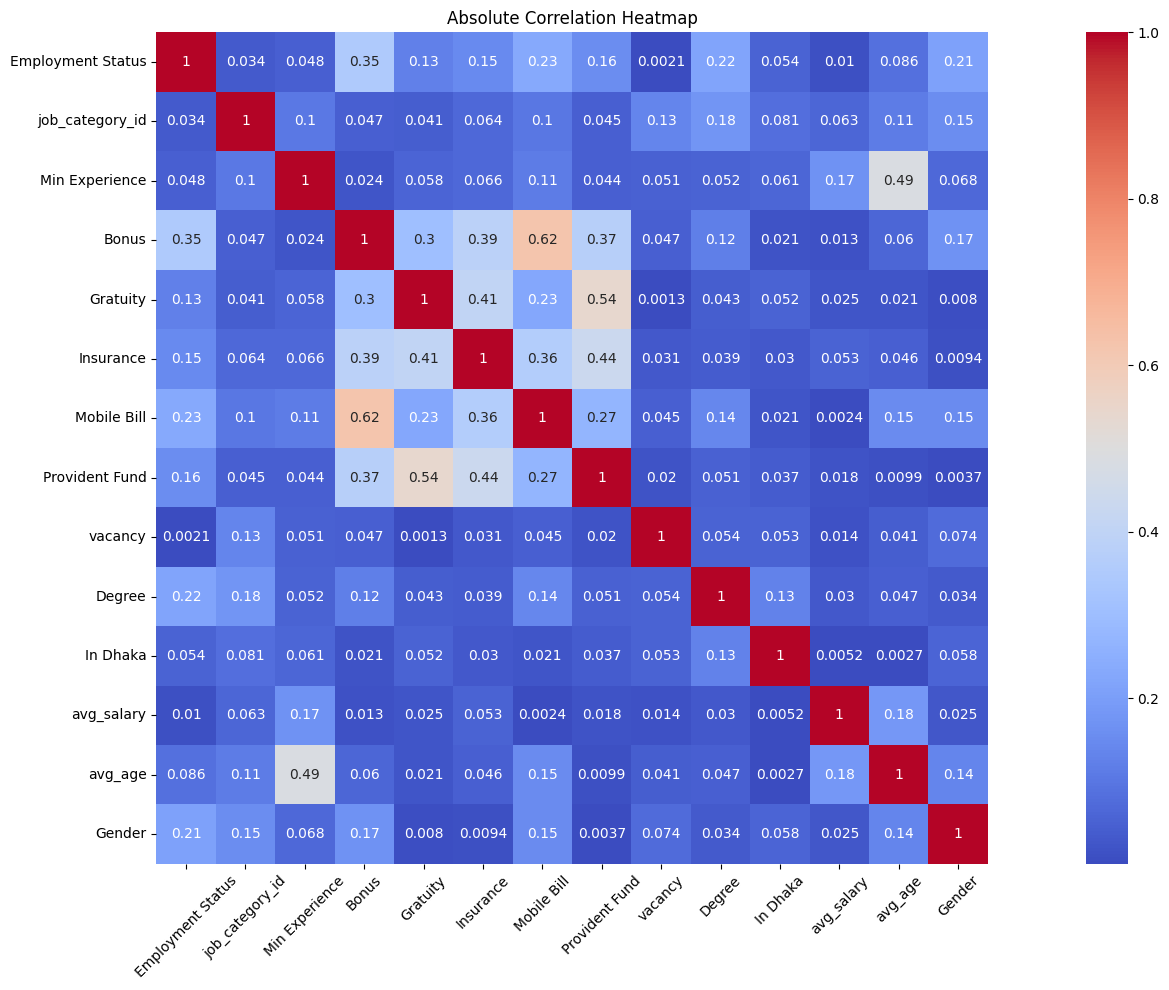

In [24]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(), annot=True, cmap='coolwarm', square=True)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Absolute Correlation Heatmap')
plt.tight_layout()
plt.show()

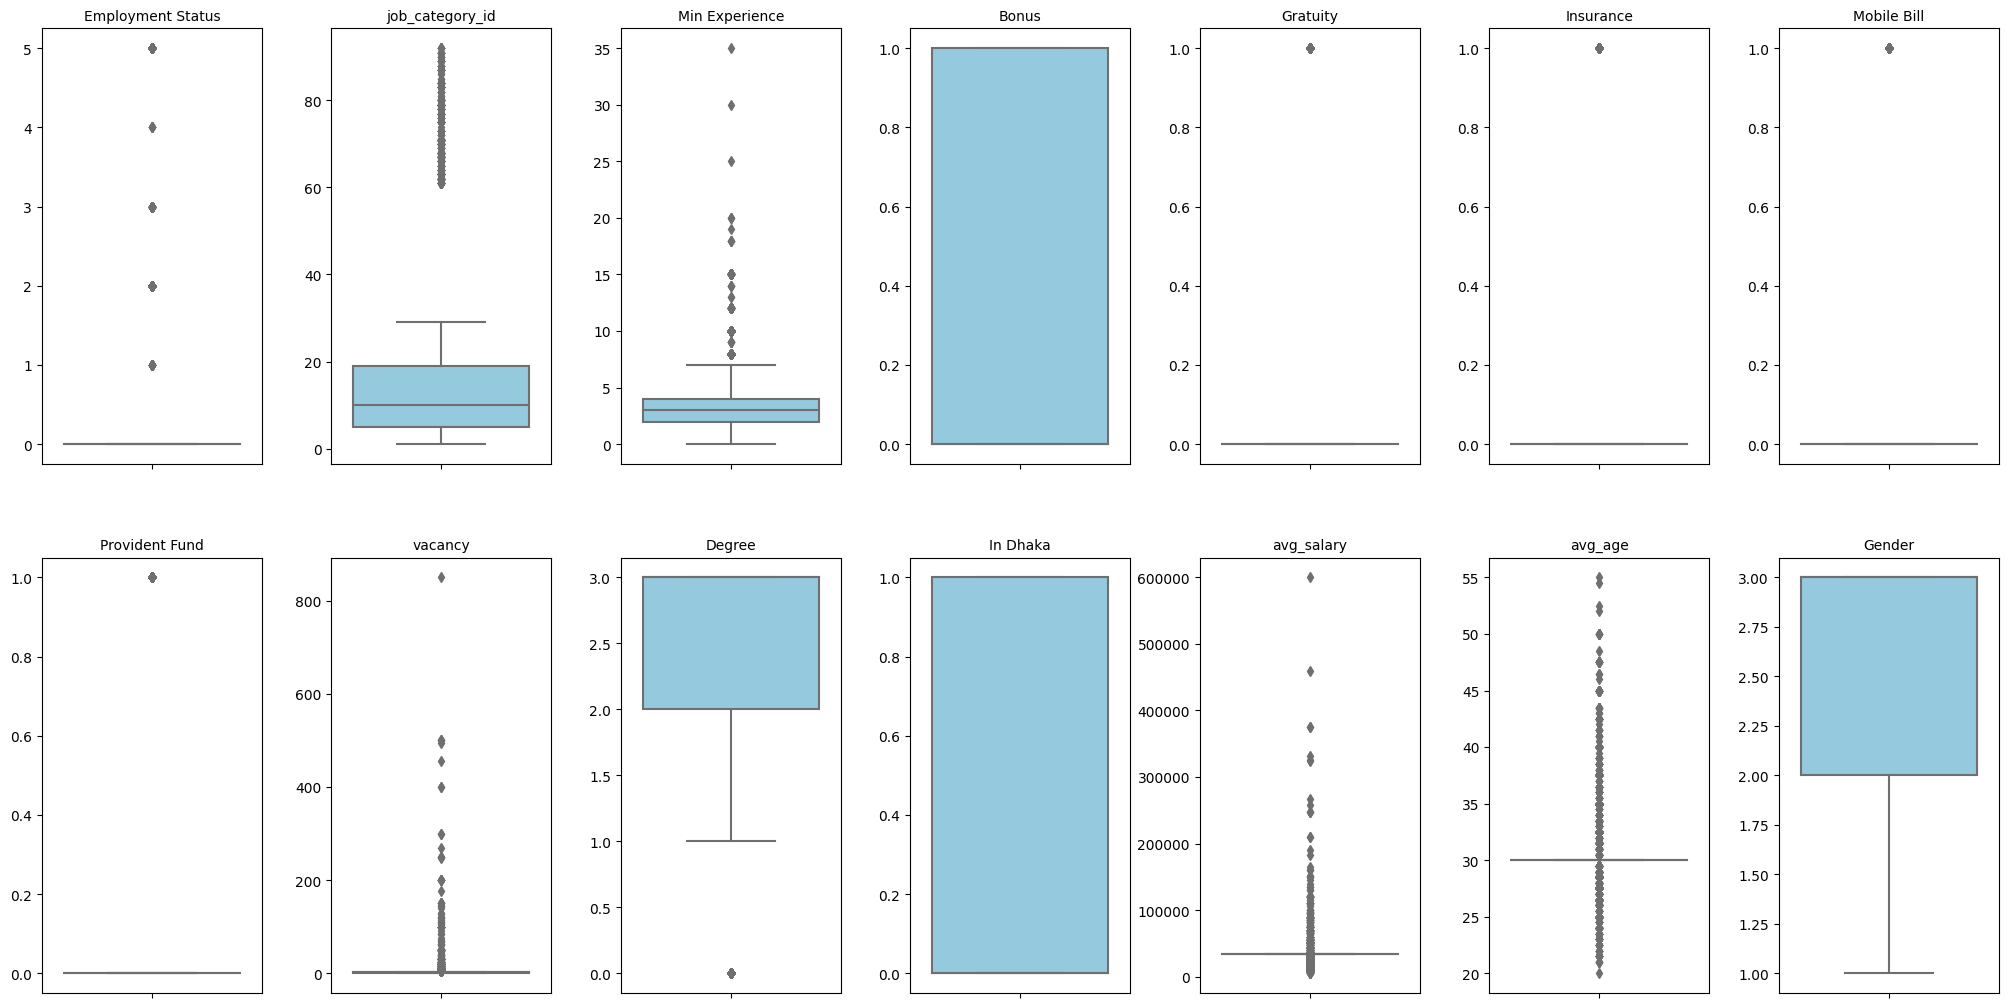

In [25]:
# Create subplots (7 columns, 2 rows)
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
axs = axs.flatten()  # Flatten to 1D array for easy iteration

# Keep track of which subplot index we're using
plot_index = 0

# Loop over columns, but only plot numeric ones
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        if plot_index < len(axs):  # Avoid index error
            sns.boxplot(y=df[column], ax=axs[plot_index], color='skyblue')
            axs[plot_index].set_title(column, fontsize=10)
            axs[plot_index].set_ylabel('')
            plot_index += 1

# Remove unused subplots
for j in range(plot_index, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [26]:
import numpy as np

for k, v in df.items():
    if pd.api.types.is_numeric_dtype(v):  # Only process numeric columns
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        iqr = q3 - q1
        v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column Employment Status outliers = 100.00%
Column job_category_id outliers = 13.03%
Column Min Experience outliers = 11.97%
Column Bonus outliers = 0.00%
Column Gratuity outliers = 100.00%
Column Insurance outliers = 100.00%
Column Mobile Bill outliers = 100.00%
Column Provident Fund outliers = 100.00%
Column vacancy outliers = 16.55%
Column Degree outliers = 5.37%
Column In Dhaka outliers = 0.00%
Column avg_salary outliers = 100.00%
Column avg_age outliers = 100.00%
Column Gender outliers = 0.00%


In [27]:
# Separate features and target
X = df.drop(columns=['avg_salary'])
# Drops target column from DataFrame to get features
y = df['avg_salary'] # Selects 'MEDV' column as target variable

print("X",X.shape)
print("y",y.shape)

X (5548, 13)
y (5548,)


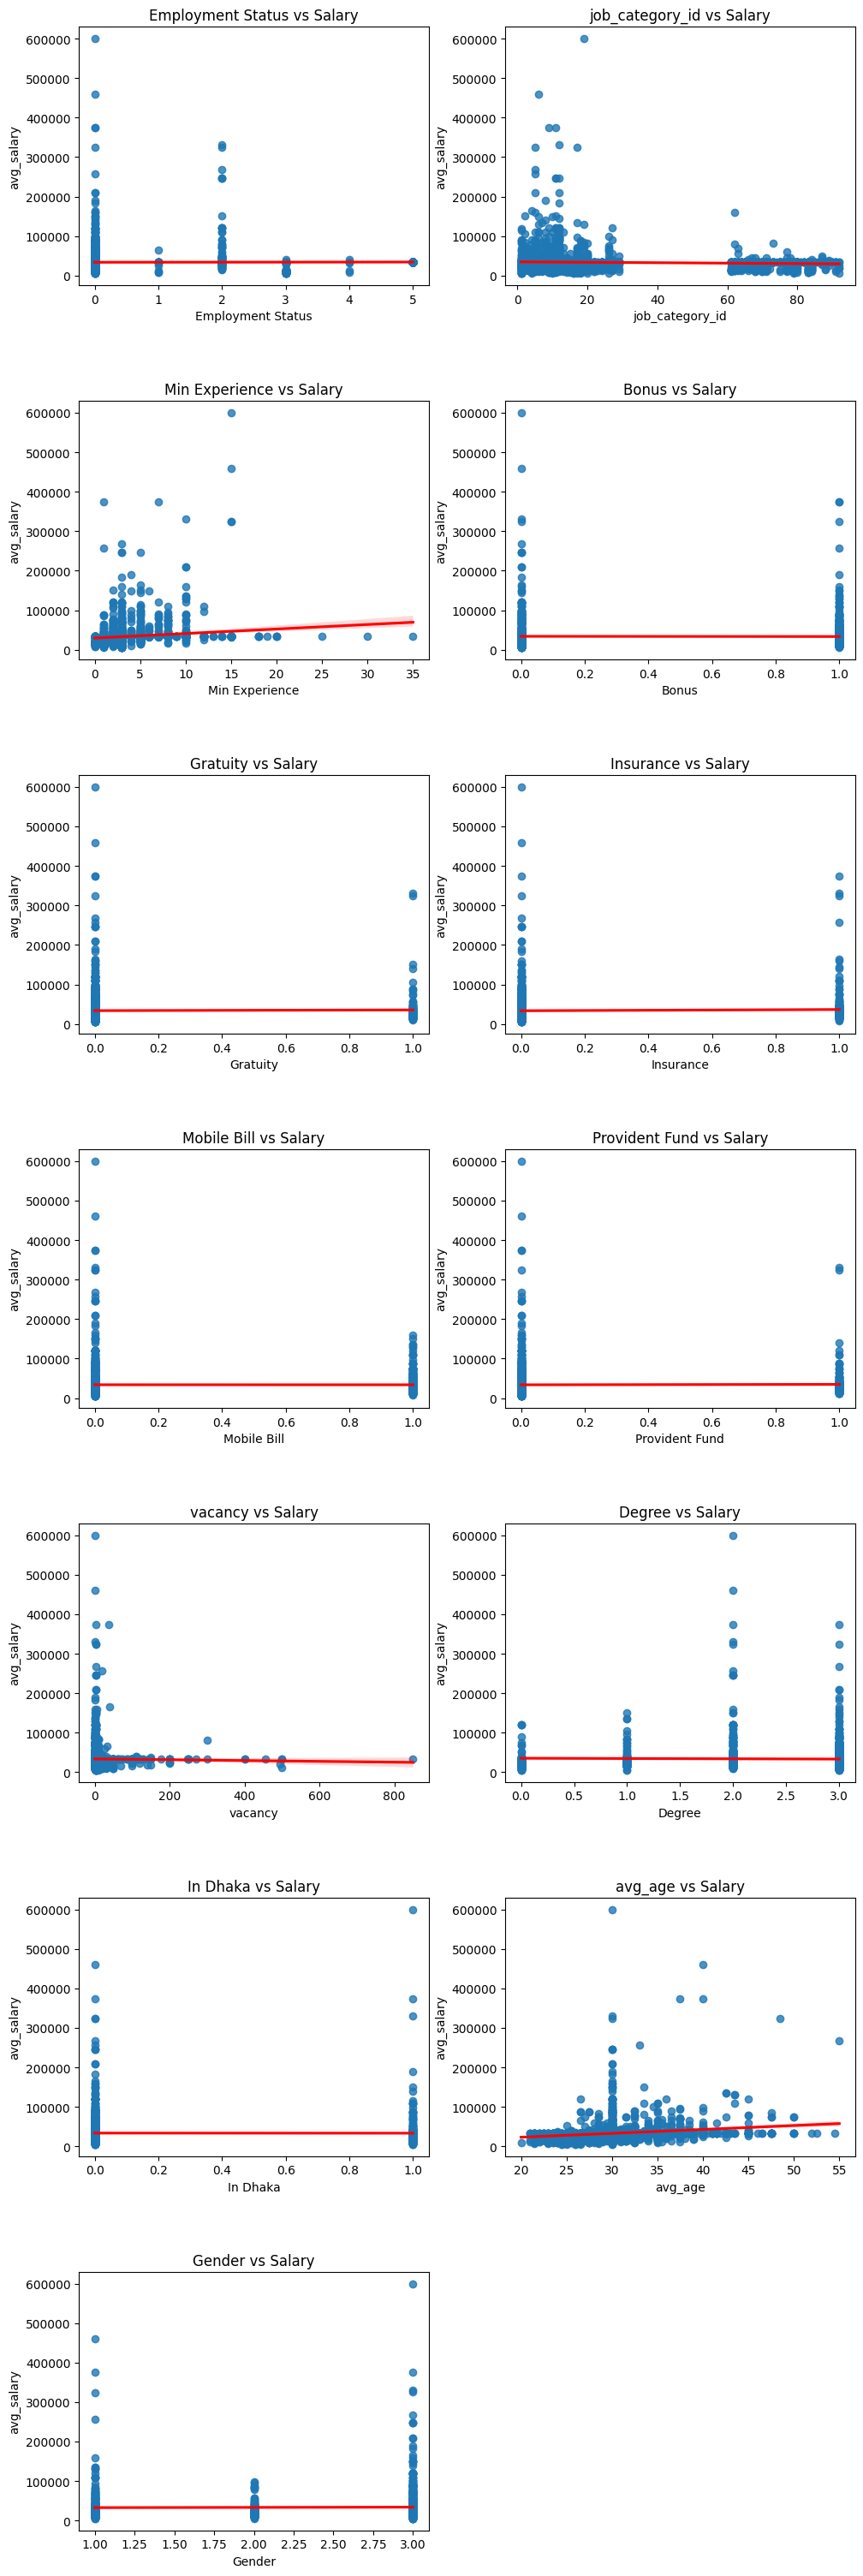

In [28]:
fig, axs = plt.subplots(ncols=2, nrows=7, figsize=(10, 30))
axs = axs.flatten()

plot_index = 0

for feature in X.columns:
    if pd.api.types.is_numeric_dtype(X[feature]):
        if plot_index < len(axs):
            sns.regplot(y=y, x=X[feature], ax=axs[plot_index], line_kws={"color": "red"})
            axs[plot_index].set_title(f'{feature} vs Salary')
            axs[plot_index].set_xlabel(feature)
            plot_index += 1

# Remove unused subplots
for j in range(plot_index, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

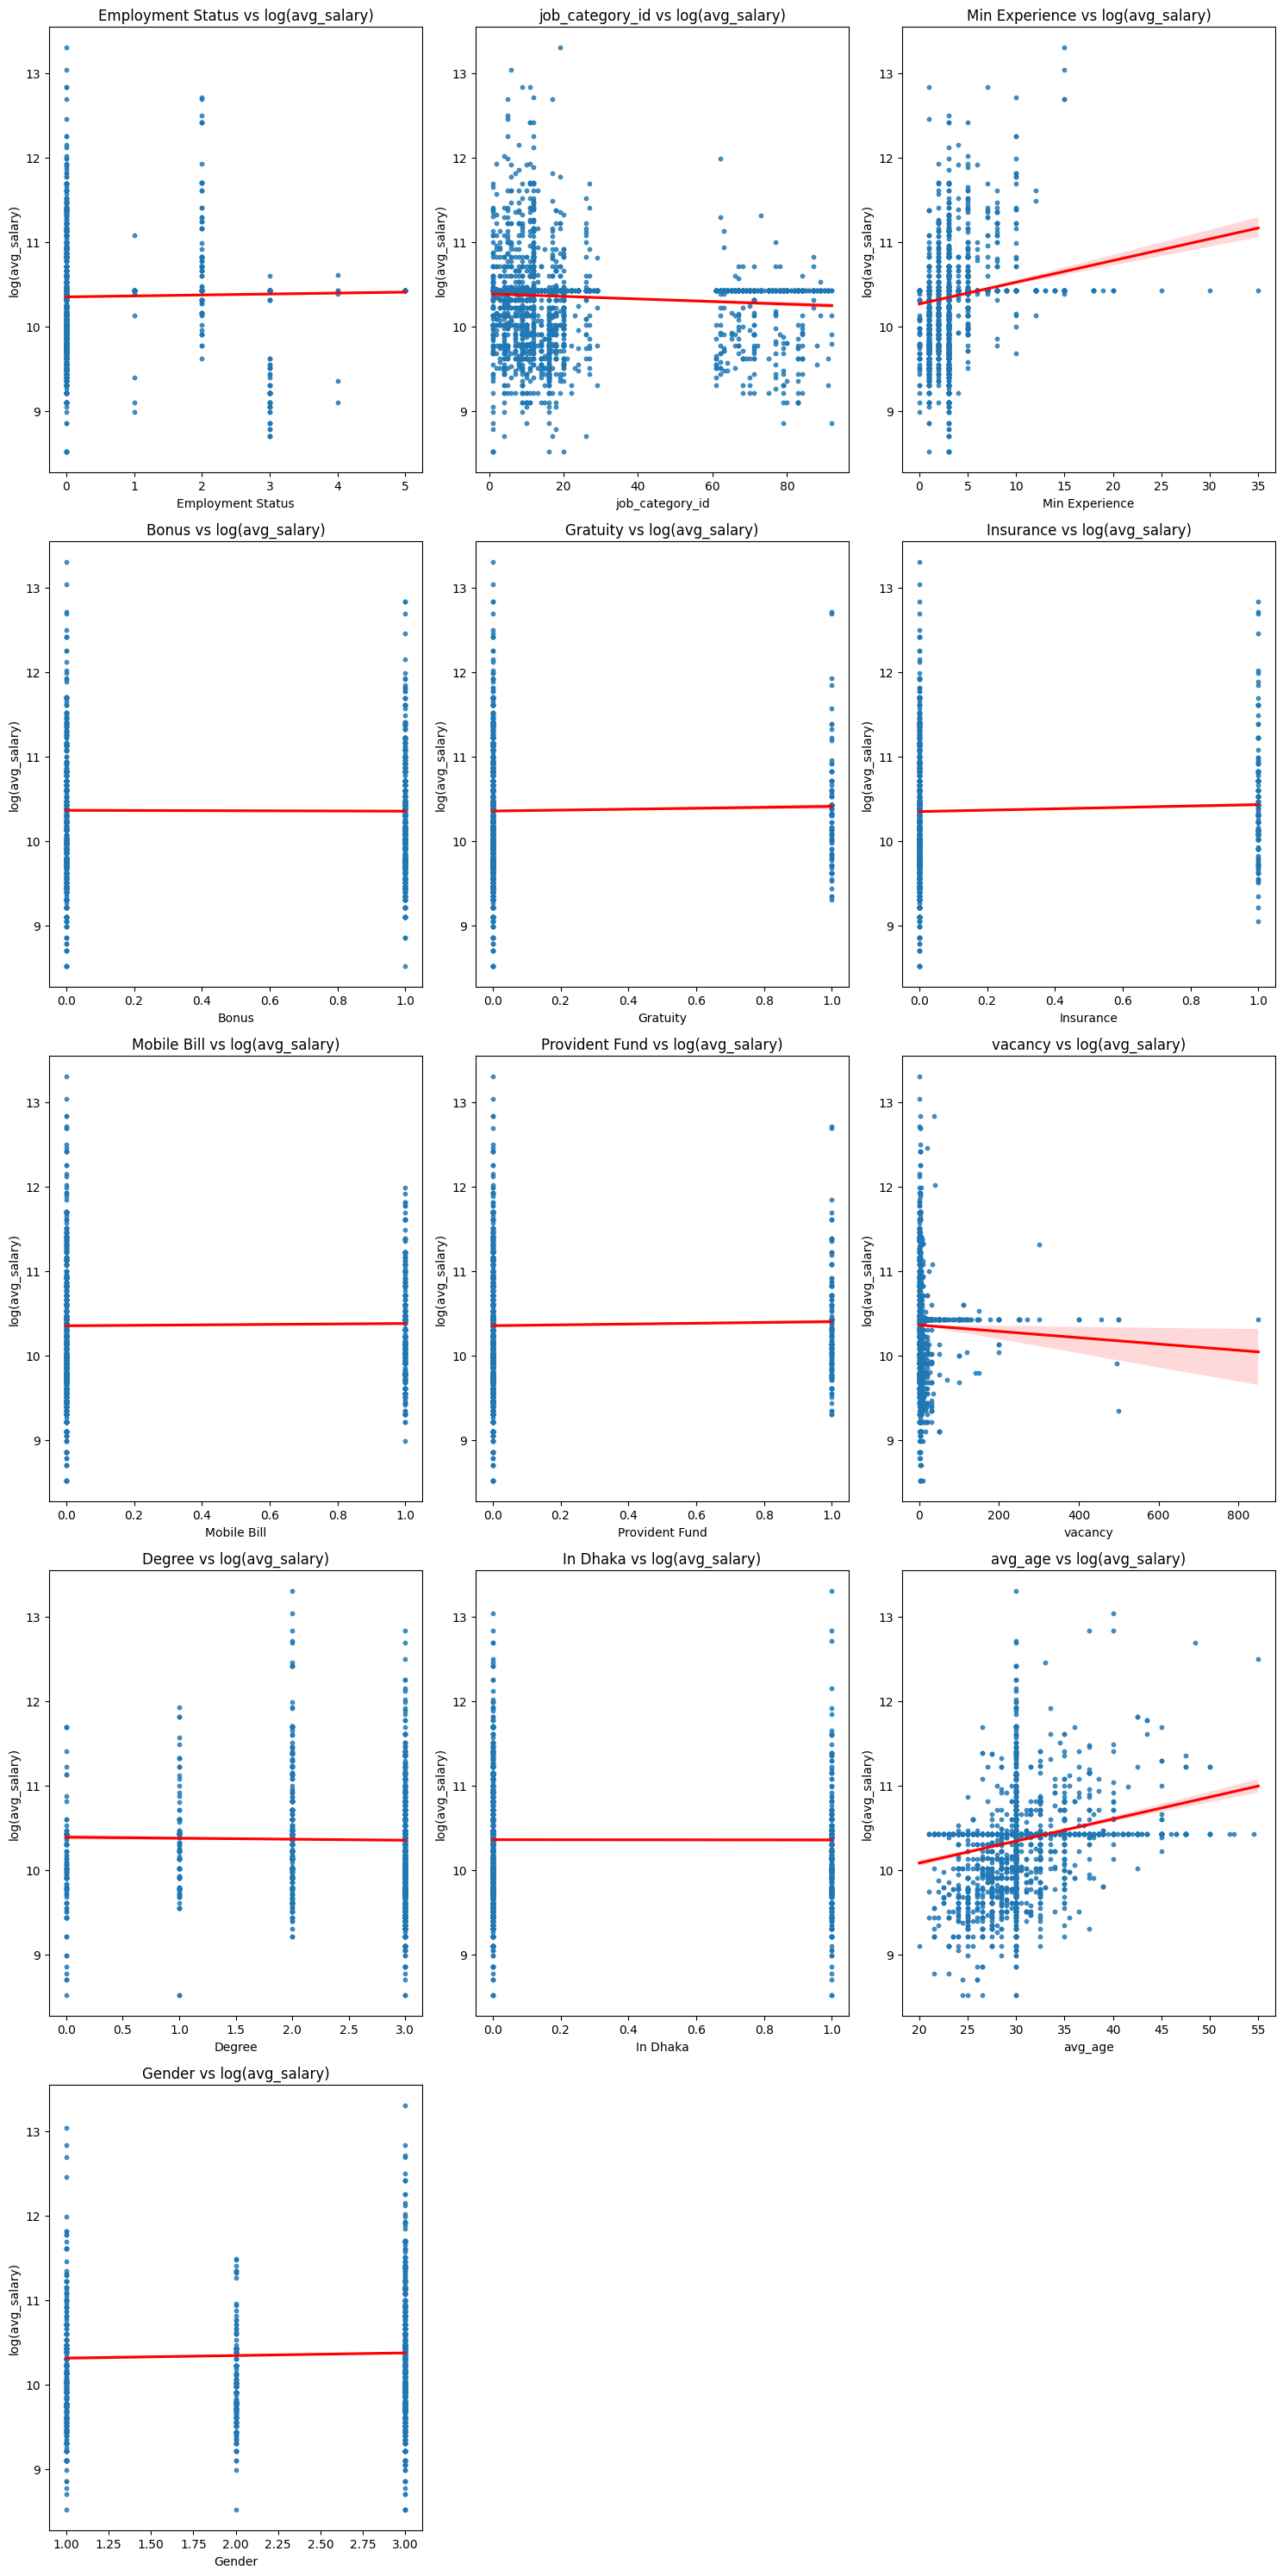

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Copy dataset
df_copy = df.copy()

# Apply log transform to avg_salary (add 1 to avoid log(0))
df_copy["log_salary"] = np.log1p(df_copy["avg_salary"])

# Select features you want to check against salary
features = [
    "Employment Status",
    "job_category_id",
    "Min Experience",
    "Bonus",
    "Gratuity",
    "Insurance",
    "Mobile Bill",
    "Provident Fund",
    "vacancy",
    "Degree",
    "In Dhaka",
    "avg_age",
    "Gender"
]

# Plot scatterplots with regression lines on log_salary
plt.figure(figsize=(15, 30))

for i, col in enumerate(features, 1):
    plt.subplot(5, 3, i)
    sns.regplot(x=df_copy[col], y=df_copy["log_salary"], scatter_kws={"s": 10}, line_kws={"color": "red"})
    plt.xlabel(col)
    plt.ylabel("log(avg_salary)")
    plt.title(f"{col} vs log(avg_salary)")

plt.tight_layout()
plt.show()

In [30]:
# Separate features and target
X = df_copy.drop(columns=['log_salary','log_salary'])
# Drops target column from DataFrame to get features
y = df_copy['log_salary'] # Selects 'MEDV' column as target variable

print("X",X.shape)
print("y",y.shape)

X (5548, 14)
y (5548,)


In [31]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet': ElasticNet(),
    'Bayesian Ridge': BayesianRidge(),
    'Huber Regressor': HuberRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Extra Trees': ExtraTreesRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'Support Vector Machine': SVR(),
    'Neural Network (MLP)': MLPRegressor(random_state=42, max_iter=1000),
    'Gaussian Process': GaussianProcessRegressor()
}

# Train models
for name, model in models.items():
    try:
        model.fit(X_train_scaled, y_train)
        print(f"{name} trained successfully.")
    except Exception as e:
        print(f"{name} failed to train. Reason: {e}")

Linear Regression trained successfully.
Ridge Regression trained successfully.
Lasso Regression trained successfully.
ElasticNet trained successfully.
Bayesian Ridge trained successfully.
Huber Regressor trained successfully.
K-Nearest Neighbors trained successfully.
Decision Tree trained successfully.
Random Forest trained successfully.
Extra Trees trained successfully.
Gradient Boosting trained successfully.
AdaBoost trained successfully.
Support Vector Machine trained successfully.
Neural Network (MLP) trained successfully.
Gaussian Process trained successfully.


In [33]:
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    mean_absolute_percentage_error, max_error, explained_variance_score
)

results = []

n = X_test_scaled.shape[0]  # number of samples
p = X_test_scaled.shape[1]  # number of features

for name, model in models.items():
    try:
        # Predict
        y_pred = model.predict(X_test_scaled)

        # Metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        mae = mean_absolute_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        max_err = max_error(y_test, y_pred)
        evs = explained_variance_score(y_test, y_pred)
        
        # Adjusted R²
        adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

        # Store results
        results.append({
            'Model': name,
            'MSE': round(mse, 3),
            'RMSE': round(rmse, 3),
            'MAE': round(mae, 3),
            'MAPE (%)': round(mape * 100, 2),
            'Max Error': round(max_err, 3),
            'R2 Score': round(r2, 3),
            'Adjusted R2': round(adj_r2, 3),
            'Explained Variance': round(evs, 3)
        })
    
    except Exception as e:
        print(f"Error evaluating {name}: {e}")

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='R2 Score', ascending=False)

# Display
results_df

,Model,MSE,RMSE,MAE,MAPE (%),Max Error,R2 Score,Adjusted R2,Explained Variance
10,Gradient Boosting,0.000,0.009,0.001,0.01,0.277,0.999,0.999,0.999
9,Extra Trees,0.000,0.013,0.001,0.01,0.395,0.999,0.999,0.999
7,Decision Tree,0.000,0.008,0.001,0.00,0.266,0.999,0.999,0.999
8,Random Forest,0.000,0.016,0.001,0.01,0.487,0.998,0.998,0.998
11,AdaBoost,0.001,0.032,0.017,0.17,0.397,0.992,0.992,0.992
12,Support Vector Machine,0.019,0.137,0.060,0.57,2.680,0.858,0.856,0.864
6,K-Nearest Neighbors,0.026,0.162,0.068,0.68,1.364,0.800,0.798,0.801
13,Neural Network (MLP),0.035,0.186,0.072,0.69,4.499,0.738,0.735,0.739
4,Bayesian Ridge,0.074,0.273,0.127,1.24,5.456,0.435,0.428,0.436
0,Linear Regression,0.075,0.273,0.127,1.24,5.471,0.434,0.427,0.435


In [34]:
df

,Employment Status,job_category_id,Min Experience,Bonus,Gratuity,Insurance,Mobile Bill,Provident Fund,vacancy,Degree,In Dhaka,avg_salary,avg_age,Gender
0,0,1,5,1,0,0,1,1,2,1,1,33750.0,35.0,3
1,0,1,4,1,0,0,1,0,2,2,1,33750.0,36.5,3
2,0,1,5,0,0,0,0,0,1,3,0,33750.0,30.0,3
3,0,1,2,1,0,0,1,0,5,3,0,33750.0,29.0,2
4,0,1,2,1,0,0,1,0,2,0,0,27500.0,30.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5543,0,92,3,0,0,0,0,0,4,2,0,20000.0,27.5,3
5544,0,92,1,1,0,0,0,0,1,3,0,7000.0,26.5,1
5545,0,92,1,0,0,0,0,0,10,3,0,25000.0,30.0,2
5546,0,92,3,1,0,0,0,0,5,2,0,18000.0,30.0,3


In [35]:
# Save the copied df to Kaggle working directory
out_csv = "/kaggle/working/bdjobs_cleaned_processed.csv"
df.to_csv(out_csv, index=False)

In [47]:
# Create salary classes
assert 'avg_salary' in df.columns, "Column 'avg_salary' not found."

# Use quantiles to split into 3 roughly balanced classes
q1, q2 = df['avg_salary'].quantile([0.33, 0.66])
def salary_to_class(s):
    if s <= q1:
        return 0
    elif s <= q2:
        return 1
    else:
        return 2

df['salary_class'] = df['avg_salary'].apply(salary_to_class)

df['salary_class'].value_counts().sort_index()


salary_class
0    5180
2     368
Name: count, dtype: int64

In [49]:
# Cell 5: Features/target split
target_col = 'salary_class'
drop_cols = ['avg_salary', target_col]  # remove regression target & the class itself

X = df.drop(columns=drop_cols, errors='ignore')
y = df[target_col].astype(int)

# Ensure all inputs are numeric (they already are in your dataset)
assert all(np.issubdtype(dt, np.number) for dt in X.dtypes), "Non-numeric features found."

# Stratified split to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape, y_train.value_counts(), y_test.value_counts()

((4438, 13),
 (1110, 13),
 salary_class
 0    4144
 2     294
 Name: count, dtype: int64,
 salary_class
 0    1036
 2      74
 Name: count, dtype: int64)

In [52]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support, classification_report,
    confusion_matrix, roc_auc_score
)

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, ExtraTreesClassifier,
    GradientBoostingClassifier, AdaBoostClassifier
)
from sklearn.neural_network import MLPClassifier

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Optional (silence warnings)
import warnings
warnings.filterwarnings("ignore")

In [53]:
#  Define models (with pipelines where useful)
models = {}
RANDOM_STATE = 42
# Linear family
models['Logistic Regression'] = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=2000, class_weight='balanced', random_state=RANDOM_STATE))
])

models['Ridge Classifier'] = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RidgeClassifier(random_state=RANDOM_STATE))
])

# SVMs
models['Linear SVM'] = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LinearSVC(C=1.0, class_weight='balanced', random_state=RANDOM_STATE))
])

models['RBF SVM'] = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=RANDOM_STATE))
])

# Neighbors
models['KNN'] = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=15))
])

# Trees / Ensembles
models['Decision Tree'] = DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight='balanced')
models['Random Forest'] = RandomForestClassifier(
    n_estimators=300, max_depth=None, random_state=RANDOM_STATE, n_jobs=-1, class_weight='balanced'
)
models['Extra Trees'] = ExtraTreesClassifier(
    n_estimators=400, random_state=RANDOM_STATE, n_jobs=-1, class_weight='balanced'
)
models['Gradient Boosting'] = GradientBoostingClassifier(random_state=RANDOM_STATE)
models['AdaBoost'] = AdaBoostClassifier(n_estimators=300, random_state=RANDOM_STATE)

# MLP
models['MLP'] = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=600, random_state=RANDOM_STATE))
])

# Try XGBoost / LightGBM if available
try:
    from xgboost import XGBClassifier
    models['XGBoost'] = XGBClassifier(
        n_estimators=600, learning_rate=0.05, max_depth=8, subsample=0.8, colsample_bytree=0.8,
        random_state=RANDOM_STATE, objective='multi:softprob', eval_metric='mlogloss'
    )
except Exception as e:
    print("XGBoost not available:", e)

try:
    from lightgbm import LGBMClassifier
    models['LightGBM'] = LGBMClassifier(
        n_estimators=800, learning_rate=0.05, max_depth=-1,
        random_state=RANDOM_STATE, objective='multiclass'
    )
except Exception as e:
    print("LightGBM not available:", e)

list(models.keys())

['Logistic Regression',
 'Ridge Classifier',
 'Linear SVM',
 'RBF SVM',
 'KNN',
 'Decision Tree',
 'Random Forest',
 'Extra Trees',
 'Gradient Boosting',
 'AdaBoost',
 'MLP',
 'XGBoost',
 'LightGBM']

In [56]:
# Train all models and keep fitted copies

fitted_models = {}
train_errors = {}

for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        fitted_models[name] = model
        print(f"✔ Trained: {name}")
    except Exception as e:
        train_errors[name] = str(e)
        print(f"✖ Failed: {name} -> {e}")

# Optional: inspect any training errors
train_errors


✔ Trained: Logistic Regression
✔ Trained: Ridge Classifier
✔ Trained: Linear SVM
✔ Trained: RBF SVM
✔ Trained: KNN
✔ Trained: Decision Tree
✔ Trained: Random Forest
✔ Trained: Extra Trees
✔ Trained: Gradient Boosting
✔ Trained: AdaBoost
✔ Trained: MLP
✖ Failed: XGBoost -> Invalid classes inferred from unique values of `y`.  Expected: [0 1], got [0 2]
✖ Failed: LightGBM -> Number of classes should be specified and greater than 1 for multiclass training


[LightGBM] [Fatal] Number of classes should be specified and greater than 1 for multiclass training


{'XGBoost': 'Invalid classes inferred from unique values of `y`.  Expected: [0 1], got [0 2]',
 'LightGBM': 'Number of classes should be specified and greater than 1 for multiclass training'}

In [58]:
# Evaluation 
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support, classification_report
)

results = []
per_model_reports = {}

for name, model in fitted_models.items():
    try:
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec_m, rec_m, f1_m, _ = precision_recall_fscore_support(
            y_test, y_pred, average='macro', zero_division=0
        )
        prec_w, rec_w, f1_w, _ = precision_recall_fscore_support(
            y_test, y_pred, average='weighted', zero_division=0
        )

        results.append({
            "Model": name,
            "Accuracy": round(acc, 4),
            "F1 (macro)": round(f1_m, 4),
            "F1 (weighted)": round(f1_w, 4),
            "Precision (macro)": round(prec_m, 4),
            "Precision (weighted)": round(prec_w, 4),
            "Recall (macro)": round(rec_m, 4),
            "Recall (weighted)": round(rec_w, 4),
        })

        per_model_reports[name] = classification_report(y_test, y_pred, digits=4)
        print(f"✔ Evaluated: {name}")
    except Exception as e:
        print(f"✖ Eval failed: {name} -> {e}")

results_df = pd.DataFrame(results).sort_values(by=["F1 (macro)", "Accuracy"], ascending=False)
results_df

✔ Evaluated: Logistic Regression
✔ Evaluated: Ridge Classifier
✔ Evaluated: Linear SVM
✔ Evaluated: RBF SVM
✔ Evaluated: KNN
✔ Evaluated: Decision Tree
✔ Evaluated: Random Forest
✔ Evaluated: Extra Trees
✔ Evaluated: Gradient Boosting
✔ Evaluated: AdaBoost
✔ Evaluated: MLP


,Model,Accuracy,F1 (macro),F1 (weighted),Precision (macro),Precision (weighted),Recall (macro),Recall (weighted)
7,Extra Trees,0.9351,0.6778,0.9274,0.7374,0.9235,0.6453,0.9351
10,MLP,0.9279,0.6362,0.9185,0.6881,0.9130,0.6100,0.9279
5,Decision Tree,0.8991,0.6139,0.9015,0.6089,0.9040,0.6197,0.8991
8,Gradient Boosting,0.9396,0.6079,0.9205,0.8379,0.9285,0.5724,0.9396
6,Random Forest,0.9306,0.6006,0.9153,0.6936,0.9095,0.5738,0.9306
9,AdaBoost,0.9342,0.5633,0.9121,0.7387,0.9122,0.5444,0.9342
1,Ridge Classifier,0.9333,0.4828,0.9011,0.4667,0.8711,0.5000,0.9333
4,KNN,0.9333,0.4828,0.9011,0.4667,0.8711,0.5000,0.9333
3,RBF SVM,0.6477,0.4811,0.7360,0.5347,0.9022,0.6293,0.6477
0,Logistic Regression,0.6135,0.4663,0.7092,0.5351,0.9050,0.6361,0.6135


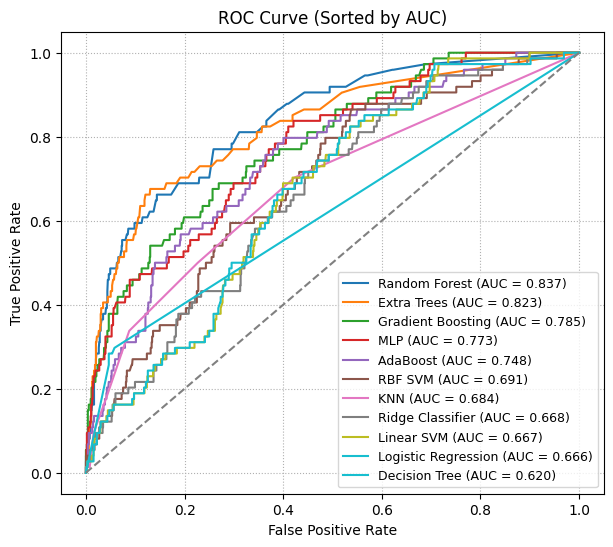

,Model,AUC
0,Random Forest,0.8367
1,Extra Trees,0.8235
2,Gradient Boosting,0.7846
3,MLP,0.7735
4,AdaBoost,0.7476
5,RBF SVM,0.6906
6,KNN,0.6835
7,Ridge Classifier,0.6684
8,Linear SVM,0.6665
9,Logistic Regression,0.6659


In [105]:
# --- Sort curves by AUC descending ---
roc_curves = sorted(roc_curves, key=lambda x: x[3], reverse=True)

# --- Plot ---
plt.figure(figsize=(7, 6))
colors = cm.get_cmap("tab10", len(roc_curves))

for idx, (name, fpr, tpr, roc_auc) in enumerate(roc_curves):
    plt.plot(fpr, tpr, color=colors(idx),
             label=f"{name} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Sorted by AUC)")
plt.legend(loc="lower right", fontsize=9)
plt.grid(True, linestyle=":")
plt.show()

# --- Table ---
auc_df = pd.DataFrame(auc_rows)
sort_cols = [c for c in ["AUC (macro-OVR)", "AUC"] if c in auc_df.columns]
auc_df = auc_df.sort_values(by=sort_cols, ascending=False, na_position="last").reset_index(drop=True)
auc_df

In [131]:
# Core
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

# Ensembles & base estimators
from sklearn.ensemble import BaggingClassifier, StackingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

# Optional: XGBoost (Kaggle usually has it)
try:
    from xgboost import XGBClassifier
    HAS_XGB = True
except Exception:
    HAS_XGB = False
    print("XGBoost not available; skipping XGBClassifier.")


In [133]:
le = LabelEncoder()
y_enc = le.fit_transform(y)
n_classes = len(le.classes_)
print(f"Encoded {n_classes} classes:", list(le.classes_))

Encoded 2 classes: [0, 2]


In [145]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)
X_train.shape, X_test.shape

((4438, 13), (1110, 13))

In [146]:
def evaluate_and_print(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    row = pd.DataFrame([{
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1 (macro)": f1_score(y_test, y_pred, average='macro'),
        "F1 (weighted)": f1_score(y_test, y_pred, average='weighted'),
        "Precision (macro)": precision_score(y_test, y_pred, average='macro', zero_division=0),
        "Precision (weighted)": precision_score(y_test, y_pred, average='weighted', zero_division=0),
        "Recall (macro)": recall_score(y_test, y_pred, average='macro'),
        "Recall (weighted)": recall_score(y_test, y_pred, average='weighted'),
    }])
    print(row.to_string(index=False))

In [149]:
evaluate_and_print(
    "Bagging (Decision Tree)",
    BaggingClassifier(
        estimator=DecisionTreeClassifier(),
        n_estimators=100,
        max_samples=0.8,        # 80% bootstrap sample per estimator
        bootstrap=True,         # resample with replacement
        max_features=1.0,
        bootstrap_features=False,
        random_state=42,
        n_jobs=-1
    )
)

                  Model  Accuracy  F1 (macro)  F1 (weighted)  Precision (macro)  Precision (weighted)  Recall (macro)  Recall (weighted)
Bagging (Decision Tree)  0.936937    0.653255        0.92507           0.755276              0.922348        0.614865           0.936937


In [137]:
evaluate_and_print(
    "Bagging (SVM)",
    BaggingClassifier(
        estimator=SVC(probability=True),
        n_estimators=50,
        max_samples=0.8,
        bootstrap=True,
        random_state=42,
        n_jobs=-1
    )
)

        Model  Accuracy  F1 (macro)  F1 (weighted)  Precision (macro)  Precision (weighted)  Recall (macro)  Recall (weighted)
Bagging (SVM)  0.933333    0.482759       0.901149           0.466667              0.871111             0.5           0.933333


In [138]:
evaluate_and_print(
    "AdaBoost",
    AdaBoostClassifier(
        n_estimators=200,
        learning_rate=0.5,
        random_state=42
    )
)

   Model  Accuracy  F1 (macro)  F1 (weighted)  Precision (macro)  Precision (weighted)  Recall (macro)  Recall (weighted)
AdaBoost  0.931532    0.507243        0.90352           0.634058              0.894686        0.511583           0.931532


In [139]:
evaluate_and_print(
    "Gradient Boosting",
    GradientBoostingClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    )
)

            Model  Accuracy  F1 (macro)  F1 (weighted)  Precision (macro)  Precision (weighted)  Recall (macro)  Recall (weighted)
Gradient Boosting   0.93964    0.607875       0.920468             0.8379              0.928524        0.572394            0.93964


In [140]:
if HAS_XGB:
    xgb_params = dict(
        n_estimators=400,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.9,
        colsample_bytree=0.9,
        reg_lambda=1.0,
        random_state=42,
        n_jobs=-1,
        eval_metric='mlogloss'
    )
    if n_classes == 2:
        xgb_params.update(objective='binary:logistic')
    else:
        xgb_params.update(objective='multi:softprob', num_class=n_classes)

    evaluate_and_print("XGBoost", XGBClassifier(**xgb_params))
else:
    print("Skipped XGBoost (not installed).")

  Model  Accuracy  F1 (macro)  F1 (weighted)  Precision (macro)  Precision (weighted)  Recall (macro)  Recall (weighted)
XGBoost  0.936937    0.640338       0.923402           0.758912              0.921398        0.602317           0.936937


In [141]:
base_estimators = [
    ('rf',  RandomForestClassifier(n_estimators=300, random_state=42)),
    ('gb',  GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=3, random_state=42)),
    ('mlp', MLPClassifier(hidden_layer_sizes=(128,), max_iter=600, random_state=42))
]
stacking = StackingClassifier(
    estimators=base_estimators,
    final_estimator=LogisticRegression(max_iter=1000, class_weight='balanced'),
    cv=5,
    n_jobs=-1
)
evaluate_and_print("Stacking (RF+GB+MLP → LR)", stacking)

                    Model  Accuracy  F1 (macro)  F1 (weighted)  Precision (macro)  Precision (weighted)  Recall (macro)  Recall (weighted)
Stacking (RF+GB+MLP → LR)  0.803604    0.602007       0.847496           0.590348              0.922309        0.750483           0.803604


In [150]:
# ---------- Final DataFrame ----------
df_results = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
df_results

,Model,Accuracy,F1 (macro),F1 (weighted),Precision (macro),Precision (weighted),Recall (macro),Recall (weighted)
0,GradientBoosting,0.935135,0.591778,0.916247,0.748474,0.915670,0.563707,0.935135
1,Bagging (KNN),0.934234,0.581757,0.914518,0.734971,0.913123,0.556950,0.934234
2,Bagging (SVM),0.933333,0.482759,0.901149,0.466667,0.871111,0.500000,0.933333
3,Bagging (Decision Tree),0.932432,0.656098,0.923268,0.718645,0.918707,0.625000,0.932432
4,AdaBoost,0.931532,0.529829,0.906474,0.668182,0.900606,0.524131,0.931532
